In [5]:
import numpy as np  # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_excel(r'C:\Users\Mouna Ammali\Desktop\Test_Irly\Data.xlsx')

In [3]:
data

,StudentID,FirstName,FamilyName,sex,age,address,famsize,Pstatus,Medu,Fedu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,216,Clara,Merenda,F,17,U,GT3,T,4,3,...,yes,yes,3,4,5,2,4,1,22,4
1,18,Guilherme,Ruelas,M,17,U,GT3,T,3,2,...,yes,no,5,5,5,2,4,5,16,5
2,72,Francisca,Diniz,F,15,R,GT3,T,1,1,...,yes,yes,3,3,4,2,4,5,2,5
3,79,Gabriel,De Barros,F,16,U,GT3,T,3,4,...,yes,no,2,4,3,1,2,3,12,5
4,100,Lucas,Marcelino,M,16,U,GT3,T,4,4,...,yes,no,4,5,5,5,5,4,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,110,Leonor,Arvelo,M,15,U,LE3,A,4,4,...,yes,no,5,5,3,1,1,4,6,19
353,113,Afonso,Natal,M,15,U,LE3,T,4,2,...,yes,no,3,5,2,1,1,3,10,19
354,286,Matilde,Sarmento,F,18,U,GT3,T,2,2,...,yes,no,4,3,3,1,2,2,5,19
355,374,Salvador,Chaves,F,18,R,LE3,T,4,4,...,yes,no,5,4,4,1,1,1,0,19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   357 non-null    int64 
 1   FirstName   357 non-null    object
 2   FamilyName  357 non-null    object
 3   sex         357 non-null    object
 4   age         357 non-null    int64 
 5   address     357 non-null    object
 6   famsize     357 non-null    object
 7   Pstatus     357 non-null    object
 8   Medu        357 non-null    int64 
 9   Fedu        357 non-null    int64 
 10  Mjob        357 non-null    object
 11  Fjob        357 non-null    object
 12  reason      357 non-null    object
 13  guardian    357 non-null    object
 14  traveltime  357 non-null    int64 
 15  studytime   357 non-null    int64 
 16  failures    357 non-null    int64 
 17  schoolsup   357 non-null    object
 18  famsup      357 non-null    object
 19  paid        357 non-null    object
 20  activities

###### There are no missing values

## First Data exploration 

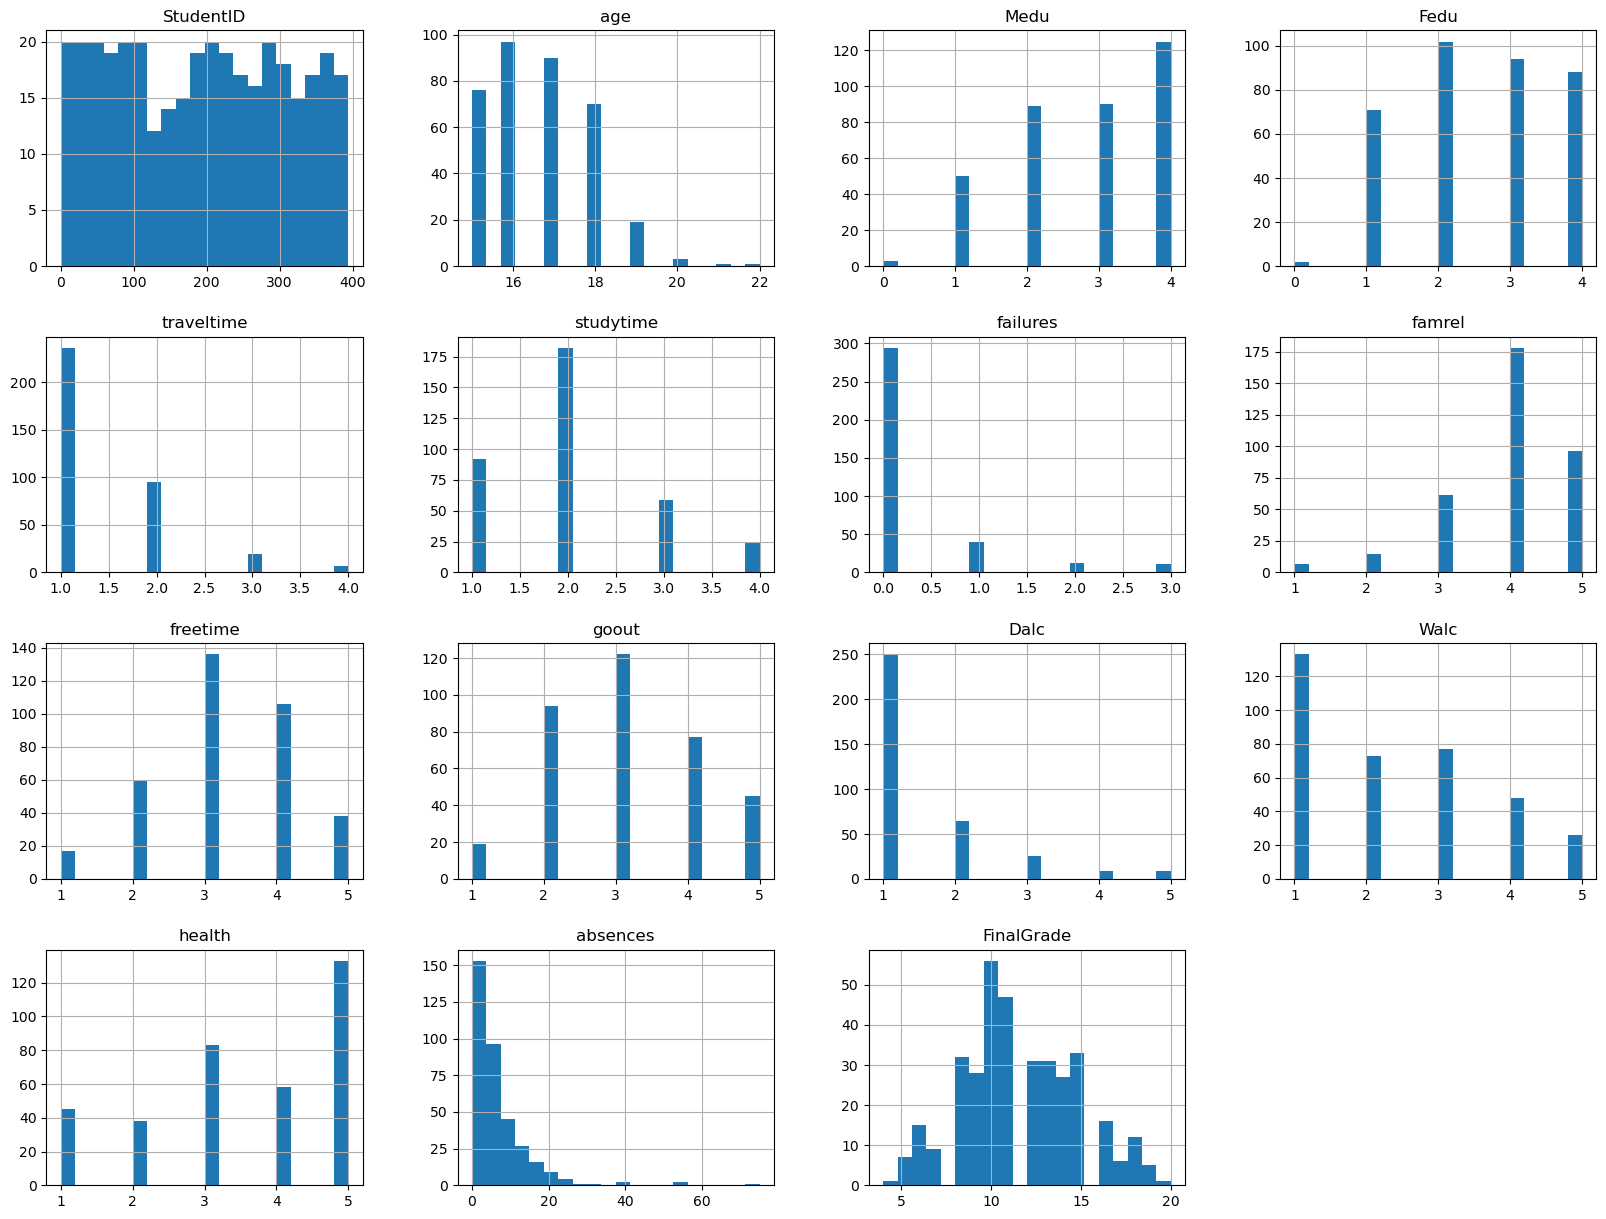

In [4]:
data.hist(figsize=(20, 15), bins=20)
plt.show()

In [11]:
data = data.drop(['StudentID'],axis=1)

In [12]:
## Correlation Matrix 
num_col = data.select_dtypes(include=['int64']).columns

In [13]:
corr_matrix = data[num_col].corr()

<Axes: >

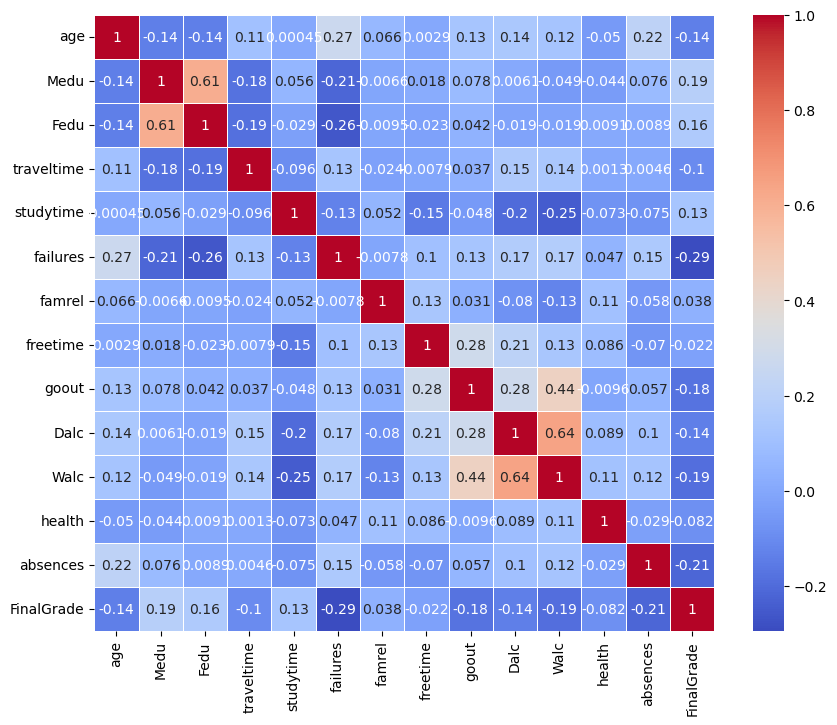

In [14]:
# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [15]:
# Rescaling 
df_scaled = data.copy()
scaler = StandardScaler()
df_scaled[['absences','FinalGrade']] = scaler.fit_transform(data[['absences','FinalGrade']])

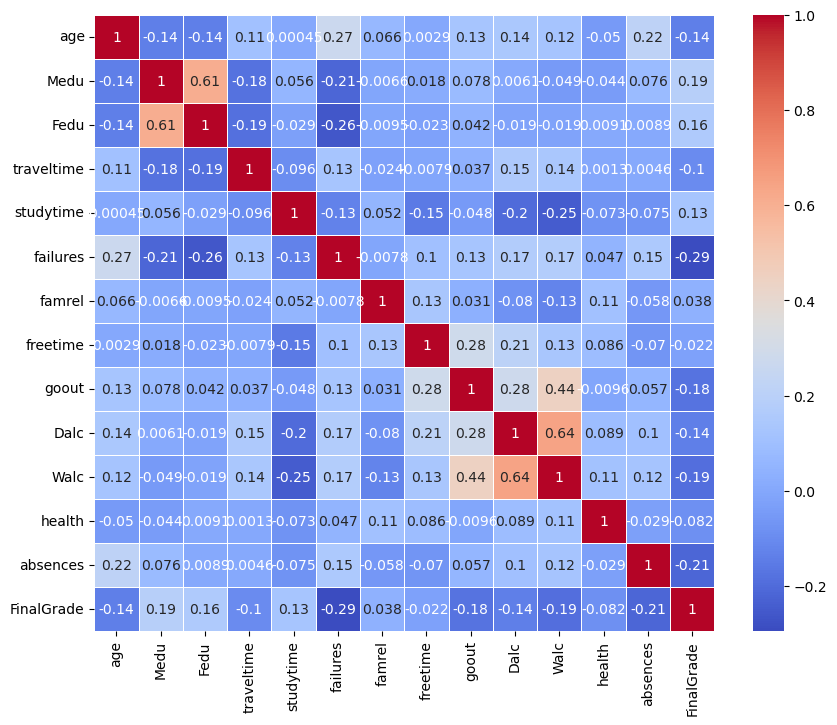

In [17]:
# Calculer la matrice de corrélation
correlation_matrix_s= df_scaled[num_col].corr()

# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_s, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


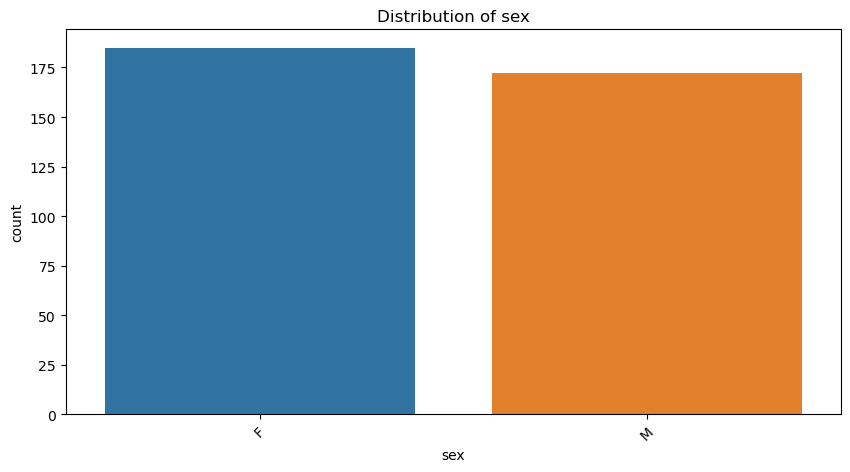

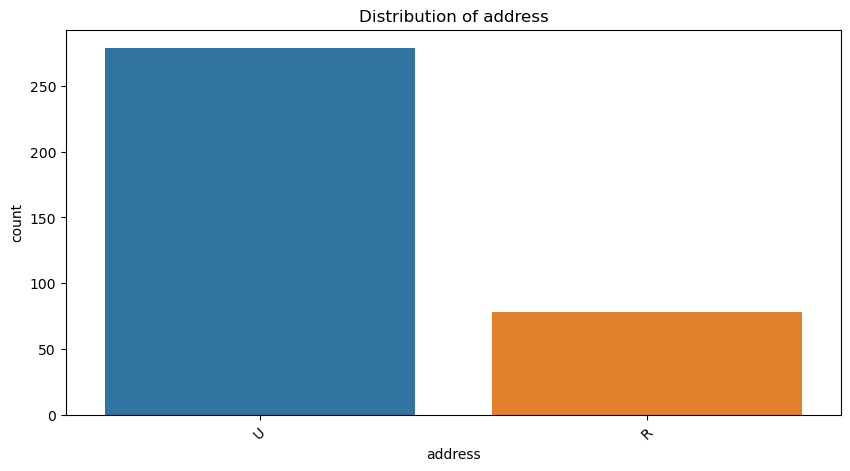

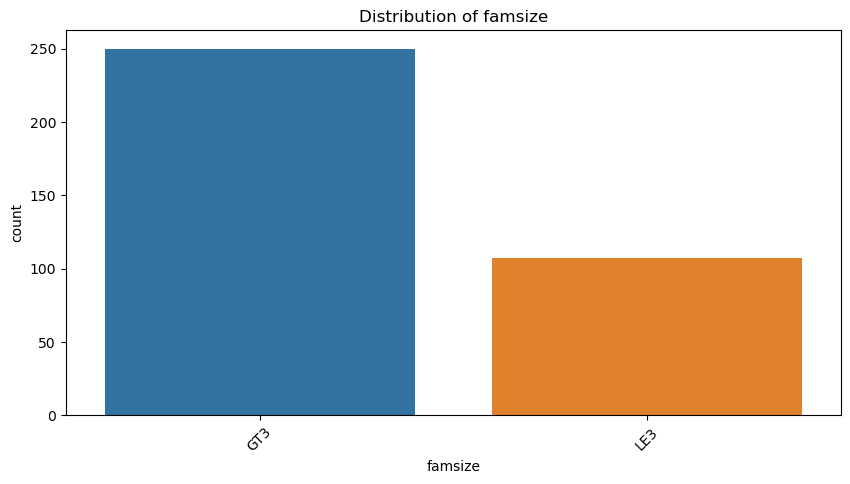

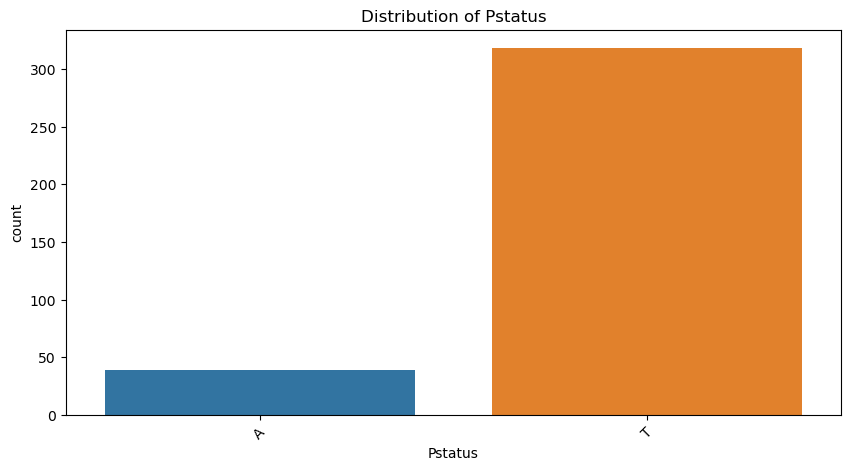

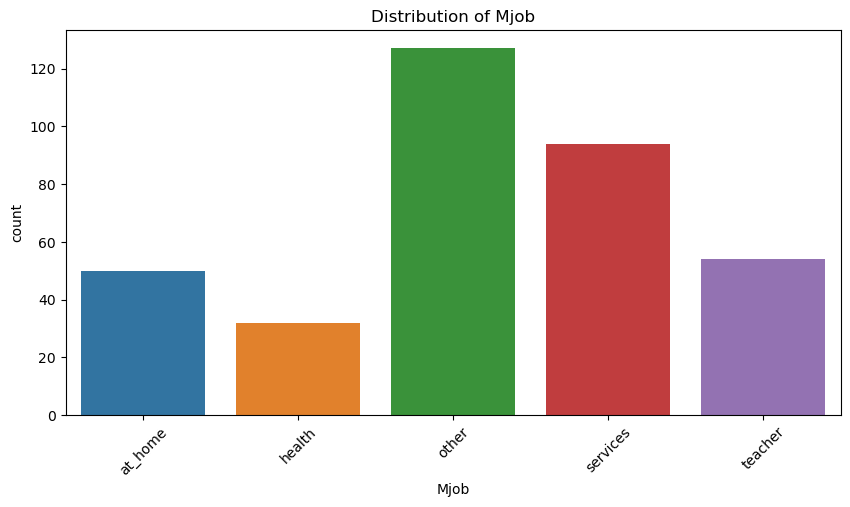

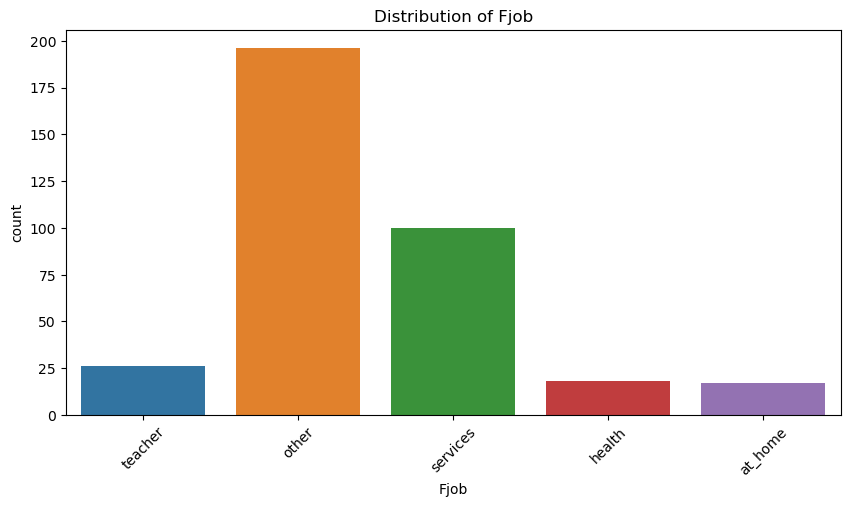

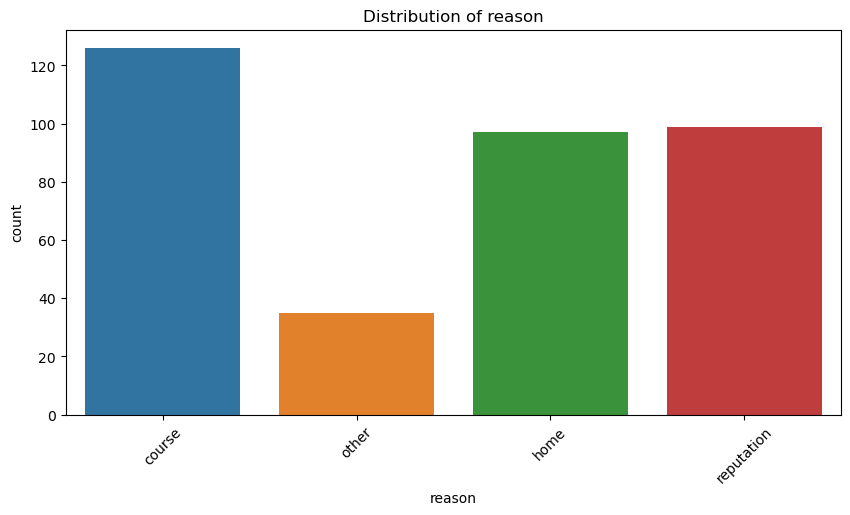

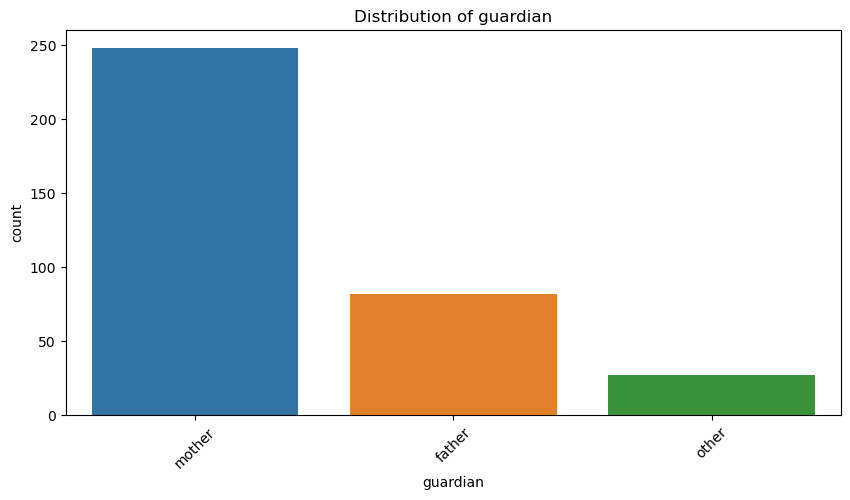

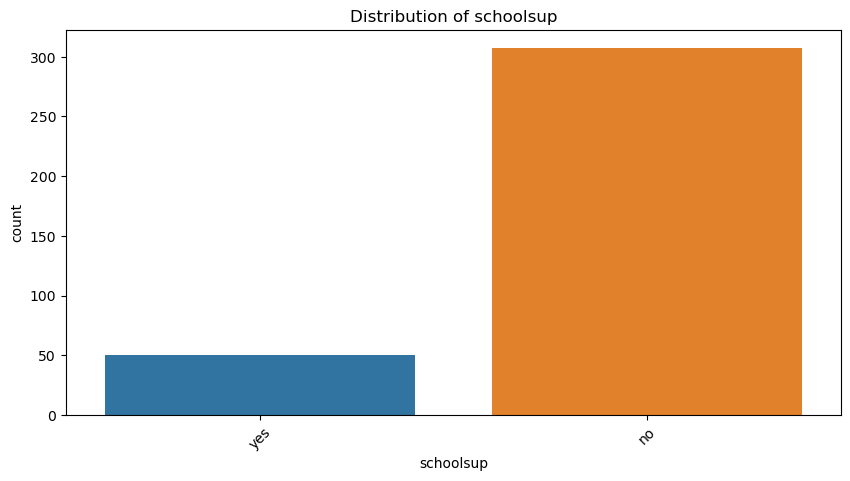

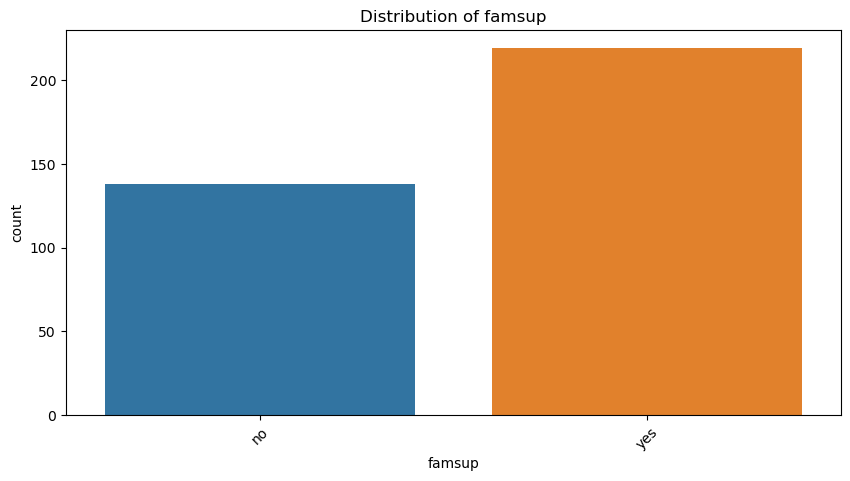

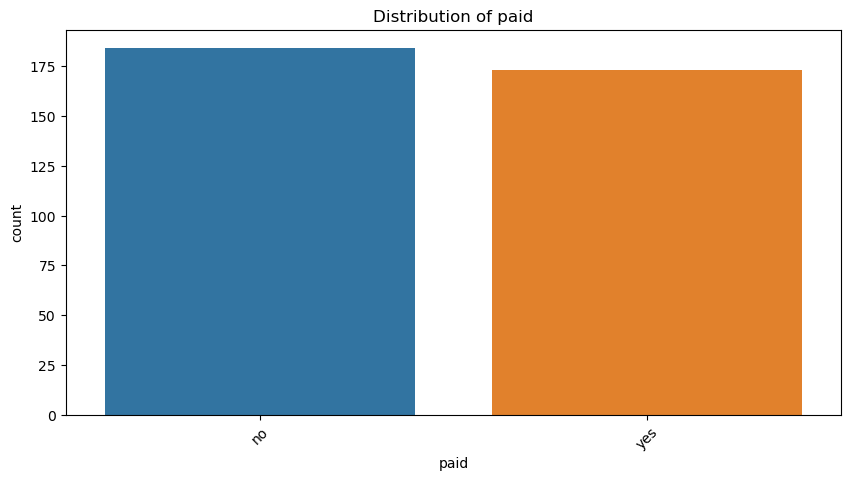

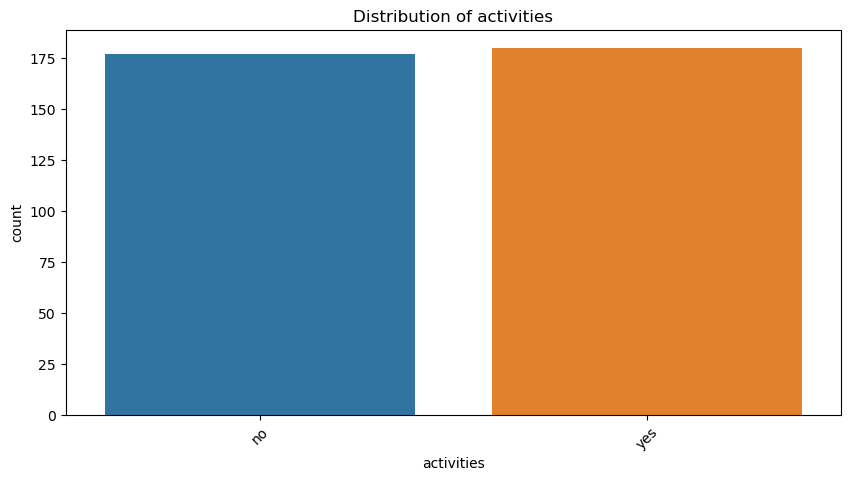

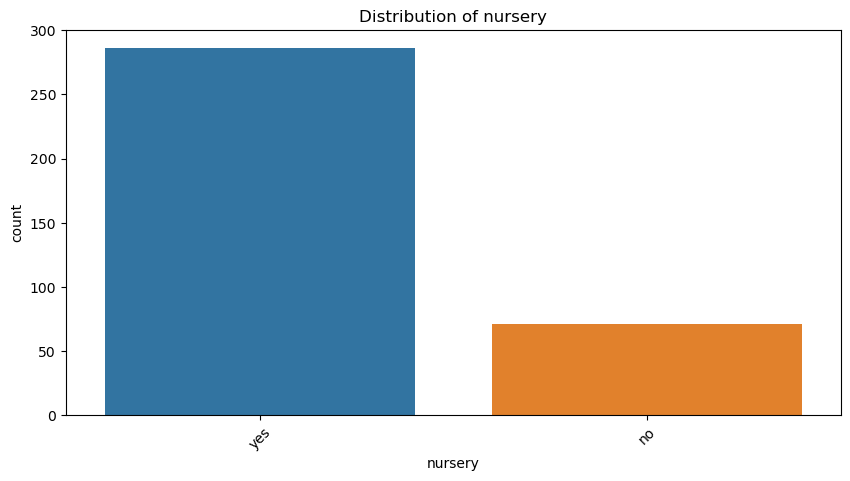

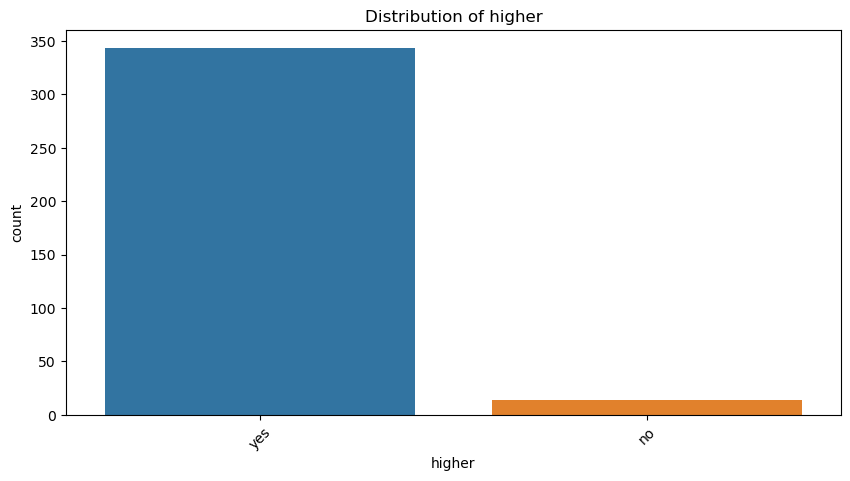

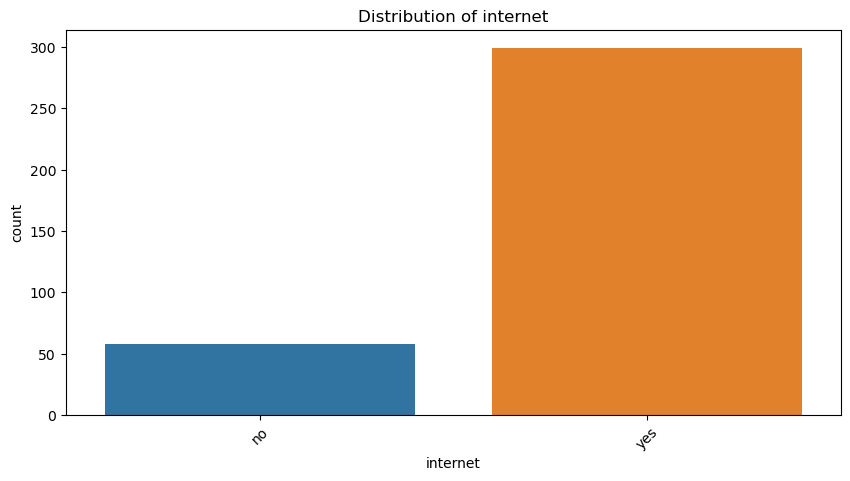

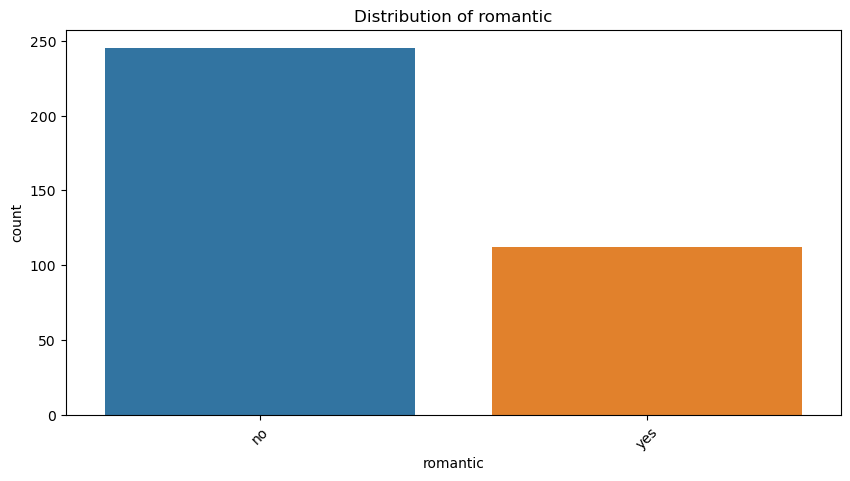

In [6]:
columns_to_exclude = [ 'FirstName', 'FamilyName']
cat_columns = data.select_dtypes(include=['object']).columns
cat_columns = cat_columns.drop(columns_to_exclude)
for col   in cat_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data= data, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
# Transform final grade in range [good, fair, bad]
# To analyze correlation between final grade and each variable 
bins = [0,10,15,20]
labels = ['bad','fair','good']
data['grade_category']= pd.cut(data['FinalGrade'],bins= bins, labels = labels,include_lowest = True)

In [14]:
data['grade_category'] = data['grade_category'].astype('object')

In [7]:
data.columns

Index(['StudentID', 'FirstName', 'FamilyName', 'sex', 'age', 'address',
       'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'FinalGrade'],
      dtype='object')

In [18]:
data = data.drop(['FirstName','FamilyName'],axis = 1 )

###  One hot encoding of categorial features 

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['FirstName', 'FamilyName', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [20]:
data_one_hot_encoded = pd.get_dummies(data, columns=['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'], drop_first=True)

In [21]:
data_one_hot_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,17,4,3,1,2,2,3,4,5,2,...,True,False,False,False,True,False,True,True,True,True
1,17,3,2,1,1,3,5,5,5,2,...,True,False,False,True,False,True,True,True,True,False
2,15,1,1,1,2,2,3,3,4,2,...,True,False,True,True,False,False,False,True,True,True
3,16,3,4,1,2,0,2,4,3,1,...,True,False,False,True,False,False,True,True,True,False
4,16,4,4,1,1,0,4,5,5,5,...,True,False,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,15,4,4,1,1,0,5,5,3,1,...,True,False,False,False,False,True,True,True,True,False
353,15,4,2,1,1,0,3,5,2,1,...,True,False,False,False,False,False,True,True,True,False
354,18,2,2,1,3,0,4,3,3,1,...,True,False,False,True,True,False,True,True,True,False
355,18,4,4,2,3,0,5,4,4,1,...,True,False,False,False,False,False,True,True,True,False


In [22]:
data_one_hot_encoded = data_one_hot_encoded.astype(int)

In [23]:
Y = data_one_hot_encoded['FinalGrade']

In [24]:
X = data_one_hot_encoded.drop(['FinalGrade'],  axis = 1 )

In [26]:
data_one_hot_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'FinalGrade',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

<Axes: >

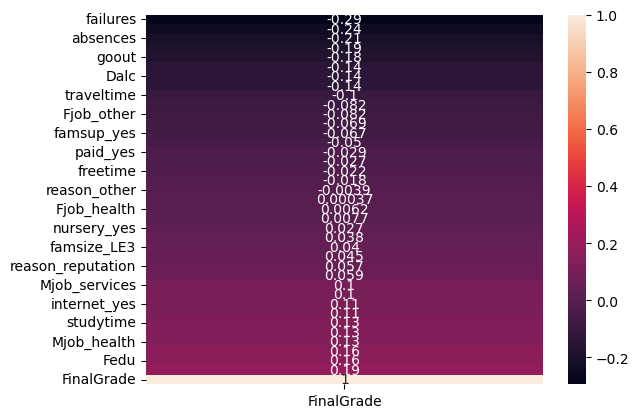

In [29]:
correlation_matrix = data_one_hot_encoded.corr()
sns.heatmap(correlation_matrix[['FinalGrade']].sort_values(by='FinalGrade'),annot=True)


In [47]:
correlation_matrix['FinalGrade']

age                 -0.140372
Medu                 0.190308
Fedu                 0.158811
traveltime          -0.099785
studytime            0.126728
failures            -0.293831
famrel               0.037711
freetime            -0.021589
goout               -0.177383
Dalc                -0.140690
Walc                -0.190054
health              -0.081691
absences            -0.213129
FinalGrade           1.000000
sex_M                0.102448
address_U            0.130090
famsize_LE3          0.039744
Pstatus_T           -0.026665
Mjob_health          0.134581
Mjob_other          -0.142541
Mjob_services        0.102134
Mjob_teacher         0.045390
Fjob_health          0.006241
Fjob_other          -0.081502
Fjob_services       -0.018154
Fjob_teacher         0.158455
reason_home          0.000372
reason_other        -0.003897
reason_reputation    0.056573
guardian_mother      0.007728
guardian_other      -0.069491
schoolsup_yes       -0.238365
famsup_yes          -0.067305
paid_yes  

In [48]:
# Linear regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [51]:
coeff = reg.coef_

In [52]:
coeff = pd.DataFrame(coeff, index=X.columns, columns= ['Coeff']) 

In [53]:
coeff

,Coeff
StudentID,0.001807
age,-0.369842
Medu,0.192241
Fedu,0.128204
traveltime,-0.004269
studytime,0.490787
failures,-0.923182
famrel,0.145416
freetime,0.043901
goout,-0.448878


# PCA

In [32]:
# Rescale 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

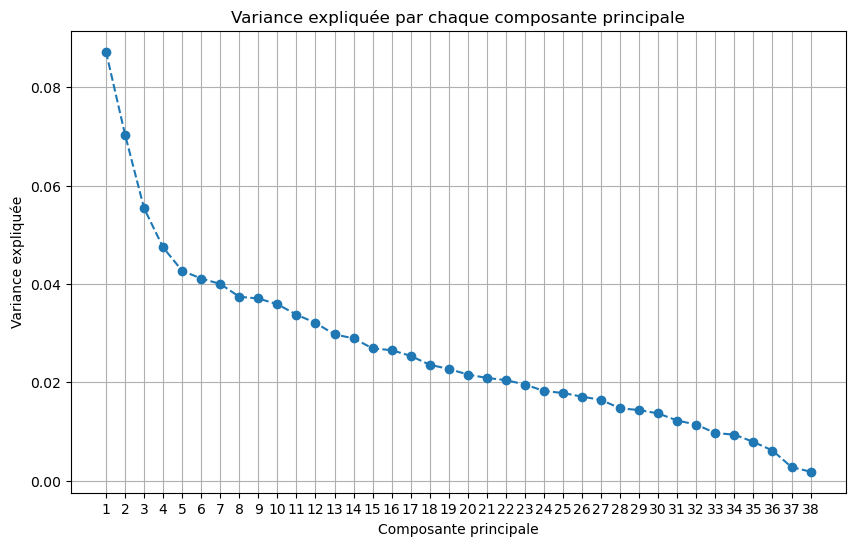

In [44]:

# Appliquer la PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Calculer la variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Tracer la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.grid()
plt.show()

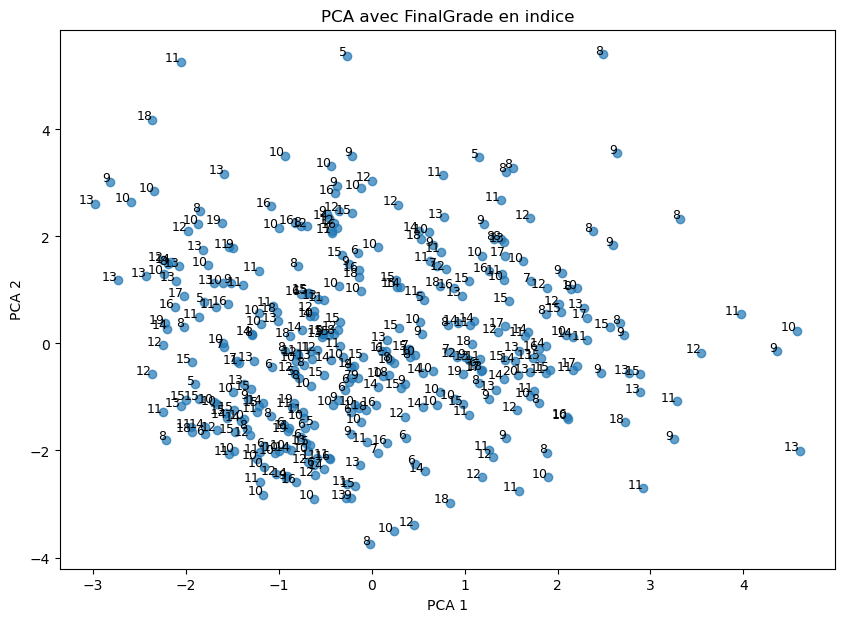

In [42]:
# Créer un DataFrame pour les résultats de la PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2','PCA3'])
pca_df['FinalGrade'] = data['FinalGrade']

# Visualisation avec Matplotlib
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PCA3'], pca_df['PCA2'], alpha=0.7)

# Ajouter les annotations des FinalGrade pour chaque point
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PCA3'][i], pca_df['PCA2'][i], pca_df['FinalGrade'][i], fontsize=9, ha='right')

# Ajouter des labels et un titre
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA avec FinalGrade en indice')

# Afficher le graphe
plt.show()

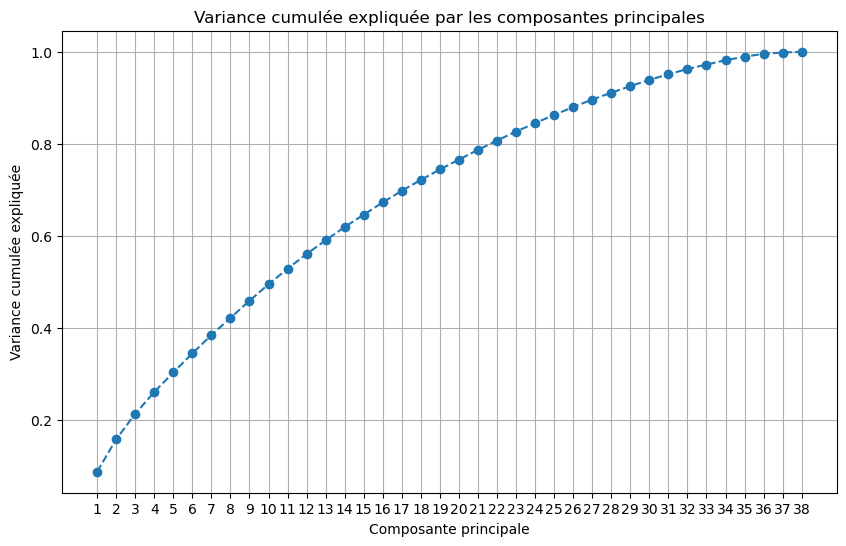

c:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [45]:
# Tracer la variance cumulée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Composante principale')
plt.ylabel('Variance cumulée expliquée')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.grid()
plt.show()

# Pour obtenir les composantes principales
pca_components = pca.transform( X)

# Convertir les composantes principales en DataFrame pour une analyse plus facile
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(len(explained_variance))])

In [62]:
data_one_hot_encoded['FinalGrade'].value_counts()

FinalGrade
10    56
11    47
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
## Regression linéaire 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [53]:
# Appliquer la régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les notes sur les données de test
y_pred = model.predict(X_test)

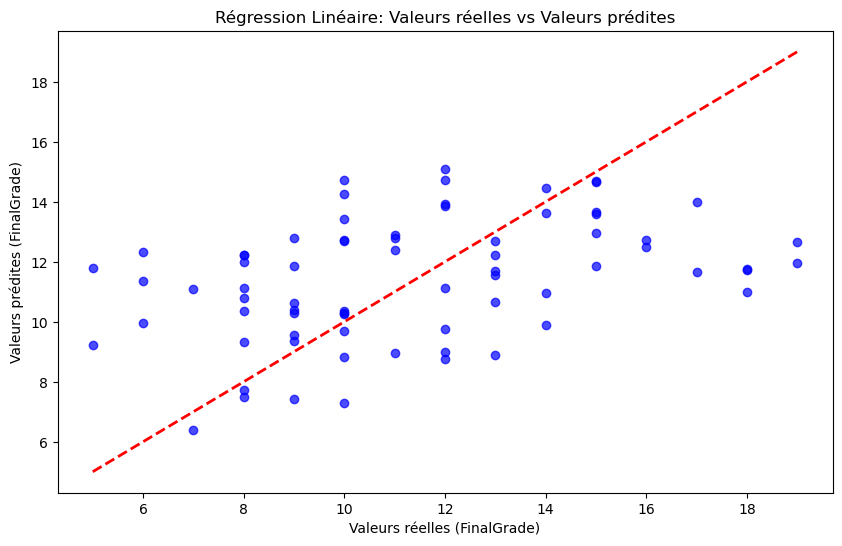

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Ajouter des labels et un titre
plt.xlabel('Valeurs réelles (FinalGrade)')
plt.ylabel('Valeurs prédites (FinalGrade)')
plt.title('Régression Linéaire: Valeurs réelles vs Valeurs prédites')

# Afficher le graphe
plt.show()

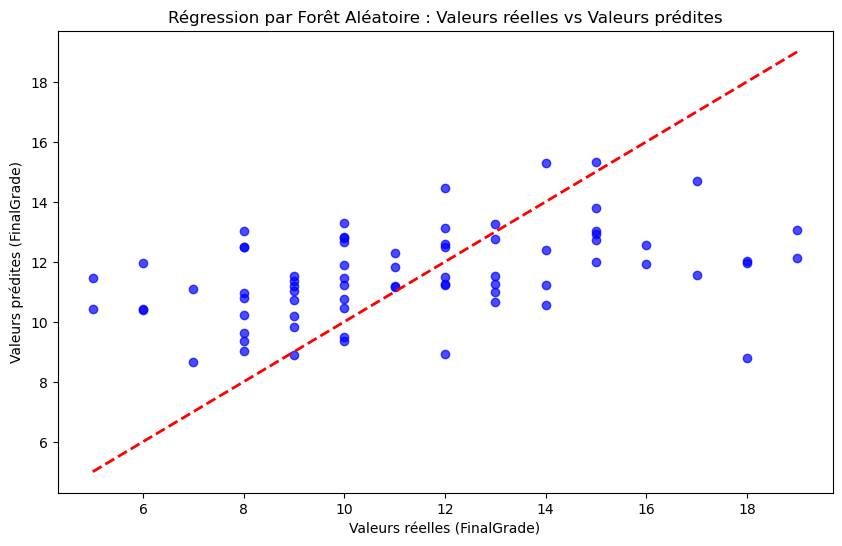

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser et entraîner le modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles (FinalGrade)')
plt.ylabel('Valeurs prédites (FinalGrade)')
plt.title('Régression par Forêt Aléatoire : Valeurs réelles vs Valeurs prédites')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score

# Effectuer une validation croisée sur le modèle de régression linéaire
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')

print("Moyenne de l'erreur quadratique moyenne (MSE) : ", -scores.mean())


Moyenne de l'erreur quadratique moyenne (MSE) :  13.868447761235206


In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialiser un modèle de régression linéaire
model = LinearRegression()

# Appliquer RFE pour sélectionner les meilleures variables
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# Voir quelles variables ont été sélectionnées
print("Variables sélectionnées : ", selector.support_)
print("Rang des variables : ", selector.ranking_)


Variables sélectionnées :  [False False False False False  True False False False False False False
 False False False False False False  True False  True False False False
  True False False False False False  True False False False False False
 False False]
Rang des variables :  [22 20 29 31  7  1 25 34  6 27 26 24 32  4  2 28 12 11  1 23  1  8 10  9
  1 19 21 30 17 16  1 14 18 15 13  3  5 33]


In [59]:
# Obtenir le masque des variables sélectionnées
selected_features = selector.support_

# Afficher les noms des variables sélectionnées
selected_variable_names = X_train.columns[selected_features]
print("Variables sélectionnées : ", selected_variable_names)

# Obtenir le classement des variables
ranking = selector.ranking_

# Créer un DataFrame pour montrer les noms des variables et leur rang respectif
ranking_df = pd.DataFrame({'Variable': X_train.columns, 'Rang': ranking})
print(ranking_df.sort_values(by='Rang'))

Variables sélectionnées :  Index(['failures', 'Mjob_other', 'Mjob_teacher', 'Fjob_teacher',
       'schoolsup_yes'],
      dtype='object')
             Variable  Rang
18         Mjob_other     1
20       Mjob_teacher     1
30      schoolsup_yes     1
5            failures     1
24       Fjob_teacher     1
14          address_U     2
35         higher_yes     3
13              sex_M     4
36       internet_yes     5
8               goout     6
4           studytime     7
21        Fjob_health     8
23      Fjob_services     9
22         Fjob_other    10
17        Mjob_health    11
16          Pstatus_T    12
34        nursery_yes    13
31         famsup_yes    14
33     activities_yes    15
29     guardian_other    16
28    guardian_mother    17
32           paid_yes    18
25        reason_home    19
1                Medu    20
26       reason_other    21
0                 age    22
19      Mjob_services    23
11             health    24
6              famrel    25
10               Walc

## Random Forest Regression 

In [67]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [69]:
# Entraîner le modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédire les valeurs de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur Quadratique Moyenne (MSE) : {mse}")
print(f"Coefficient de Détermination (R²) : {r2}")

importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nImportances des caractéristiques :")
print(feature_importances)

Erreur Quadratique Moyenne (MSE) : 9.894627777777778
Coefficient de Détermination (R²) : 0.1663890268478192

Importances des caractéristiques :
absences             0.109696
failures             0.076887
schoolsup_yes        0.070117
Medu                 0.067805
goout                0.055636
health               0.049747
studytime            0.045328
age                  0.044501
freetime             0.040381
Walc                 0.037608
famrel               0.034832
Fedu                 0.031593
Mjob_services        0.026846
sex_M                0.025003
Dalc                 0.022030
reason_reputation    0.016308
Mjob_other           0.016155
activities_yes       0.015536
paid_yes             0.015499
traveltime           0.015200
famsup_yes           0.015184
address_U            0.014499
Fjob_teacher         0.014496
Mjob_health          0.013314
romantic_yes         0.013301
internet_yes         0.011784
Fjob_other           0.011635
famsize_LE3          0.011099
Mjob_teacher    

In [70]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'sex_M',
       'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes'],
      dtype='object')

In [72]:
from sklearn.model_selection import GridSearchCV


In [73]:
# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],        # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],        # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],        # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],          # Nombre minimum d'échantillons dans une feuille
    'max_features': ['auto', 'sqrt', 'log2']  # Nombre de caractéristiques à considérer pour la meilleure division
}

# Initialiser le modèle
rf = RandomForestRegressor(random_state=42)

# Appliquer la recherche sur grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres : ", grid_search.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres
best_rf = grid_search.best_estimator_

# Prédire les valeurs de test et recalculer le MSE
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE après optimisation : {mse}")

c:\Anaconda\envs\FSY\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
293 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\envs\FSY\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Anaconda\envs\FSY\Lib\site-packages\sklearn\utils\_p

Meilleurs paramètres :  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
MSE après optimisation : 9.535443736756687


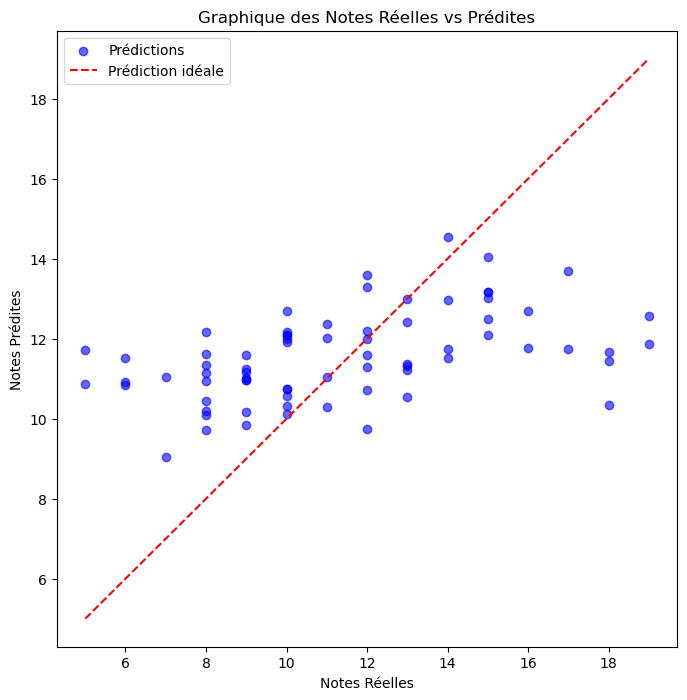

In [74]:
# Créer un scatter plot pour les notes réelles vs les notes prédites
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', label='Prédictions', alpha=0.6)

# Tracer la ligne de prédiction idéale (y = x)
min_val = min(min(y_test), min(y_pred))  # Valeur minimale
max_val = max(max(y_test), max(y_pred))  # Valeur maximale
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Prédiction idéale')

# Ajouter des titres et des labels
plt.title("Graphique des Notes Réelles vs Prédites")
plt.xlabel("Notes Réelles")
plt.ylabel("Notes Prédites")

plt.legend()

plt.show()

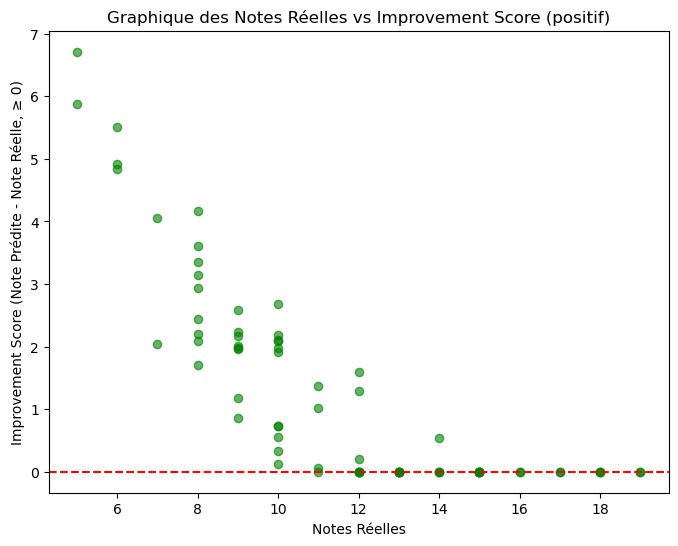

In [76]:
# Calculer l'improvement score (différence entre la note prédite et la note réelle)
improvement_score = y_pred - y_test

# Forcer les improvement scores négatifs à 0 (pour avoir uniquement des valeurs positives)
improvement_score = np.maximum(improvement_score, 0)

# Créer le graphe
plt.figure(figsize=(8, 6))
plt.scatter(y_test, improvement_score, color='green', alpha=0.6)

plt.axhline(0, color='red', linestyle='--')  # Ligne horizontale à y = 0

plt.title("Graphique des Notes Réelles vs Improvement Score (positif)")
plt.xlabel("Notes Réelles")
plt.ylabel("Improvement Score (Note Prédite - Note Réelle, ≥ 0)")

plt.show()
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Sélection des variables actionnables
actionable_features = ['studytime', 'absences', 'schoolsup_yes', 'paid_yes', 
                       'activities_yes', 'higher_yes', 'internet_yes', 'romantic_yes']

# Sélectionner les variables et la cible (FinalGrade)
X_actionable = X[actionable_features]
y = data['FinalGrade']

# Diviser en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_actionable, y, test_size=0.2, random_state=42)

# Créer un modèle de Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur Quadratique Moyenne (MSE) : {mse}")

importances = model.feature_importances_
for feature, importance in zip(actionable_features, importances):
    print(f"{feature}: {importance}")

Erreur Quadratique Moyenne (MSE) : 11.25488028948429
studytime: 0.1783891133324187
absences: 0.3805432245806418
schoolsup_yes: 0.08708292134909736
paid_yes: 0.08081490923118738
activities_yes: 0.09636794579926827
higher_yes: 0.03505489467839198
internet_yes: 0.05702925941576132
romantic_yes: 0.08471773161323323


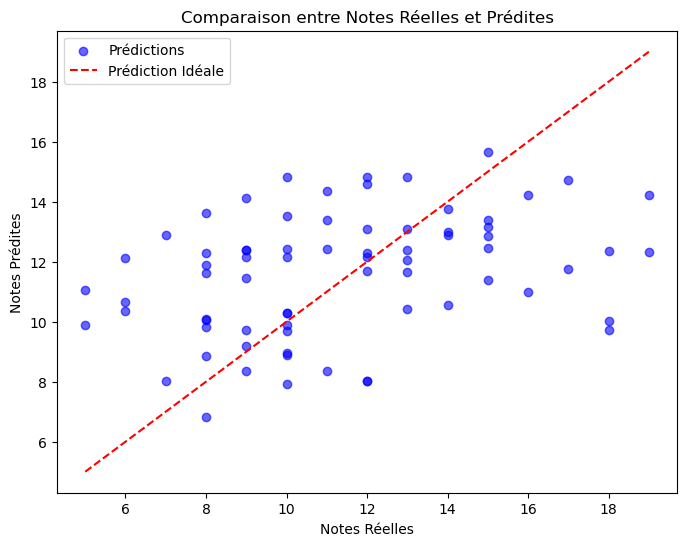

In [81]:
# Prédire les notes finales sur l'ensemble de test
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Prédictions")

min_val = min(min(y_test), min(y_pred))  # Valeur minimale pour les axes
max_val = max(max(y_test), max(y_pred))  # Valeur maximale pour les axes
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Prédiction Idéale")

plt.title("Comparaison entre Notes Réelles et Prédites")
plt.xlabel("Notes Réelles")
plt.ylabel("Notes Prédites")
plt.legend()

plt.show()

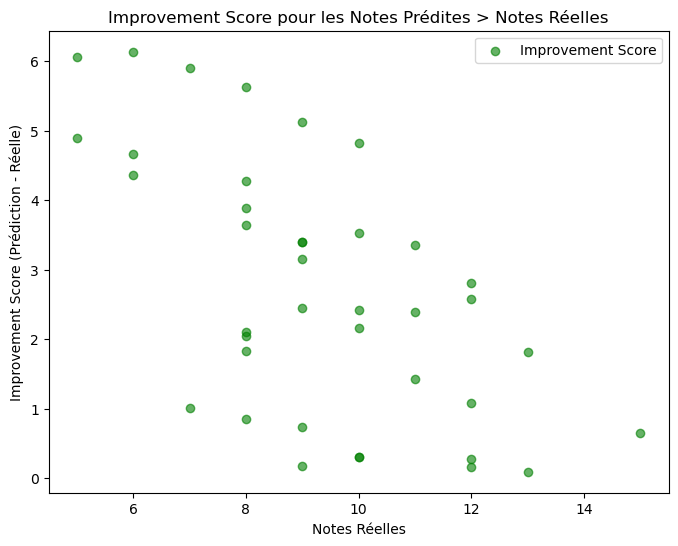

In [82]:
# Calculer l'improvement score (seulement pour les cas où la note prédite > note réelle)
improvement_score = np.where(y_pred > y_test, y_pred - y_test, 0)

# Filtrer les données pour ne garder que celles où l'improvement score est positif (note prédite > note réelle)
positive_improvement_idx = improvement_score > 0
y_test_positive = y_test[positive_improvement_idx]
improvement_score_positive = improvement_score[positive_improvement_idx]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_positive, improvement_score_positive, color='green', alpha=0.6, label="Improvement Score")

plt.title("Improvement Score pour les Notes Prédites > Notes Réelles")
plt.xlabel("Notes Réelles")
plt.ylabel("Improvement Score (Prédiction - Réelle)")

plt.legend()
plt.show()

In [2]:
!! pip install streamlit


['Collecting streamlit',
 '  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/ef/e1/f9c479f9dbe0bb702ea5ca6608f10e91a708b438f7fb4572a2642718c6e3/streamlit-1.39.0-py2.py3-none-any.whl.metadata',
 '  Using cached streamlit-1.39.0-py2.py3-none-any.whl.metadata (8.5 kB)',
 'Collecting altair<6,>=4.0 (from streamlit)',
 '  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata',
 '  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)',
 'Collecting blinker<2,>=1.0.0 (from streamlit)',
 '  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata',
 '  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)',
 'Collecting cachetools<6,>=4.0 (f

In [3]:
import streamlit as st


In [4]:
# Utiliser Streamlit pour afficher le graphique
st.title("Graphique Improvement Score avec Streamlit")
st.pyplot(plt)  # Affiche le graphique dans l'application Streamlit

# Optionnel : afficher les données sous forme de tableau
st.write("Données des Notes Réelles et des Improvement Scores :")
st.write({
    "Notes Réelles": y_test_positive,
    "Improvement Score": improvement_score_positive
})

2024-10-04 01:04:52.462 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 01:04:52.758 
  command:

    streamlit run c:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-04 01:04:52.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


NameError: name 'plt' is not defined